## Lead Scoring Case Study for X Education



## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Importing required packages
import numpy as np
import pandas as pd


# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline
from pylab import rcParams

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

C:\Users\darsh\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Importing Data

In [2]:
lead_Data=pd.read_csv("Leads.csv")
lead_Data


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0000,1845,2.6700,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0000,17.0000,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0000,238,2.0000,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,19.0000,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0000,199,2.0000,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0000,20.0000,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0000,499,3.0000,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0000,16.0000,No,No,SMS Sent


### Let's understand the structure of our dataframe

In [3]:
# Let's see the head of our dataset
lead_Data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


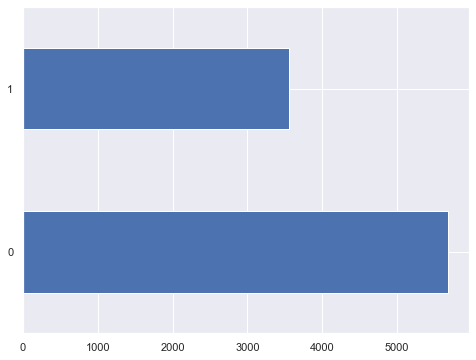

In [4]:
lead_Data.Converted.value_counts().plot(kind='barh', figsize=(8, 6))

In [5]:
100*lead_Data['Converted'].value_counts()/len(lead_Data['Converted'])

0   61.4610
1   38.5390
Name: Converted, dtype: float64

* Data is slightly imbalanced, ratio = 62:38<br>
* Most of the leads aren't converted  (Target: 0)<br>
* We need to analyse the data with other features while taking the target values separately to get some insights.

In [6]:
lead_Data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


- From above table, i can see some of the variables like TotalVisits have the outliers. I will deal with later.

In [7]:
lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Here, we can see, the data types of the vriables seeems to be fine and many columns are having missing values. 

- Let's see the number of rows and columns in te data set.

In [8]:
lead_Data.shape

(9240, 37)

## Data Preparation



##### Converting all select value to null because customers have not selected or choosen any vlaue so, it's considered as null value. 

In [9]:

for col in lead_Data.columns:
    lead_Data[col]=lead_Data[col].apply(lambda x: None if x=='Select' else x )
    
     

- Let's check the percenatge of null values after conversion of Select value.
### Identifying the missing data and using appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

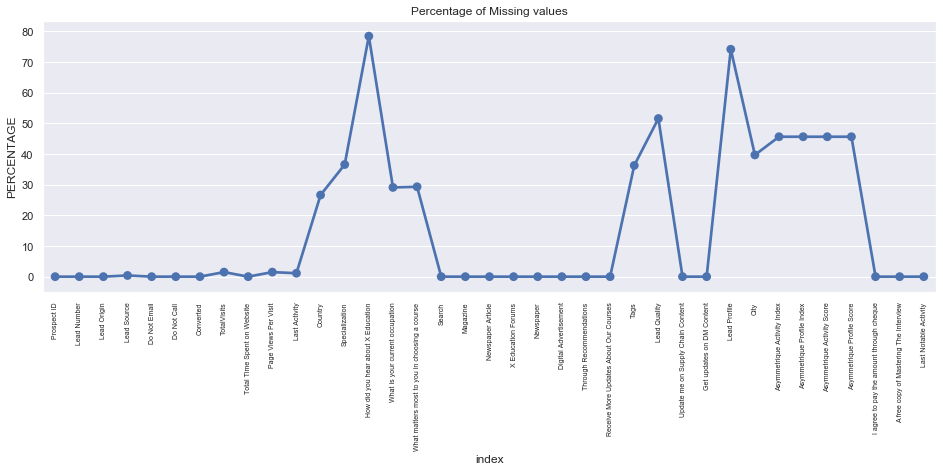

In [10]:
missing = pd.DataFrame((lead_Data.isnull().sum())*100/lead_Data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [11]:
round(100*(lead_Data.isnull().sum()/len(lead_Data.index)),2)

Prospect ID                                     0.0000 
Lead Number                                     0.0000 
Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         26.6300
Specialization                                  36.5800
How did you hear about X Education              78.4600
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                          0.0000 
Magazine                                        

## Initial intuition from the data 

* As there's no such thumb rule to drop the variables having more than certain percentage of null values, as scenarios might vary from case to case, and the amount of information we think the variable has. 

* In this particular case, let's assume 45%, and try to delete the variables having more than 45% null values, and we might have to come back to this stage to change the threshold value, as it's an iterating phase.


- let's find out all columns where missing values are more than certain percentage, lets's take 45%.

In [12]:
ColumnsWithNull_DF_lead_Data=round(100*(lead_Data.isnull().sum()/len(lead_Data.index)),2)
ColumnsWithNull_DF_lead_Data=ColumnsWithNull_DF_lead_Data[ColumnsWithNull_DF_lead_Data>45]
print("\n Number of Columns, where Null values are more than 45%: ",len(ColumnsWithNull_DF_lead_Data.index))
print(ColumnsWithNull_DF_lead_Data.index)


 Number of Columns, where Null values are more than 45%:  7
Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')


In [13]:
lead_Data_Master=lead_Data.drop(['How did you hear about X Education','Lead Profile','Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score','Lead Quality','Tags'],axis=1)

In [14]:
round(100*(lead_Data_Master.isnull().sum()/len(lead_Data_Master.index)),2)



Prospect ID                                     0.0000 
Lead Number                                     0.0000 
Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         26.6300
Specialization                                  36.5800
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                          0.0000 
Magazine                                        0.0000 
Newspaper Article                               

- From above table, we can see many variables have more than 20 to 30 % of null data. But these variables are important and required to predict the score of the leads. So, I am going to impute the each column.

- For City column, Let's check the most frequent values. 

In [15]:
lead_Data_Master['City'].describe()

count     5571  
unique    6     
top       Mumbai
freq      3222  
Name: City, dtype: object

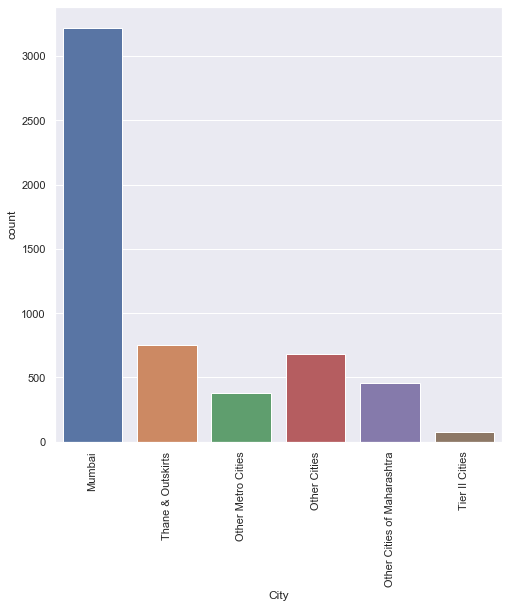

In [16]:
s=sns.countplot(lead_Data_Master['City'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- from above plot, we can see, "Mumbai" is the most frequent value. So, we can replace null value with "Mumbai"

In [17]:
lead_Data_Master['City'].fillna('Mumbai', inplace=True)

#### Specialization :- The industry domain in which the customer worked before

- Let's describe the "Specialization" column 

In [18]:
lead_Data_Master['Specialization'].describe()

count     5860              
unique    18                
top       Finance Management
freq      976               
Name: Specialization, dtype: object

- From above table, we can see Finance management is having high value. 

- Let's count each value by plotting count plot 

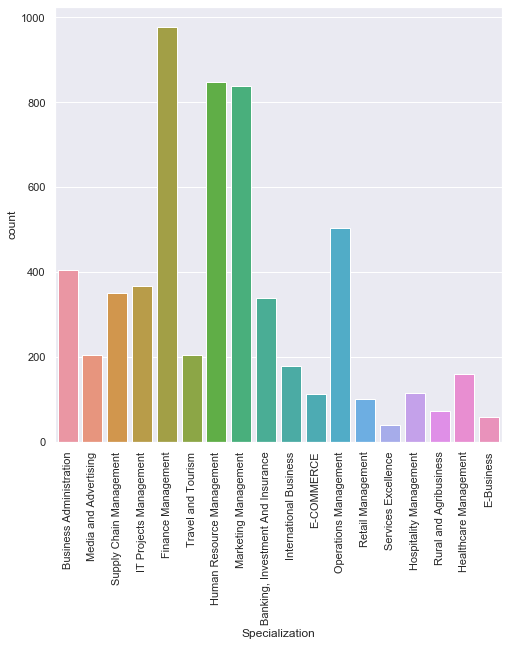

In [19]:
s=sns.countplot(lead_Data_Master['Specialization'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, customer may be a student and it may not have any specialization. Since, the number of occurrence of "Finance Management" value is high but as compared to all the rows, we can't replace null with "Finance Management". So, we will create a new category of specialization called "Others".

In [20]:
lead_Data_Master['Specialization'].fillna('Others', inplace=True)

- Here, we can see the mostly used value is  'Will revert after reading the email'. So, we can direcltly replace the null value with the same.

#### What matters most to you in choosing a course:- It indicates what is their main motto behind doing this course.

- Let's describe the "What matters most to you in choosing a course" column

In [21]:
lead_Data_Master['What matters most to you in choosing a course'].describe()

count     6531                   
unique    3                      
top       Better Career Prospects
freq      6528                   
Name: What matters most to you in choosing a course, dtype: object

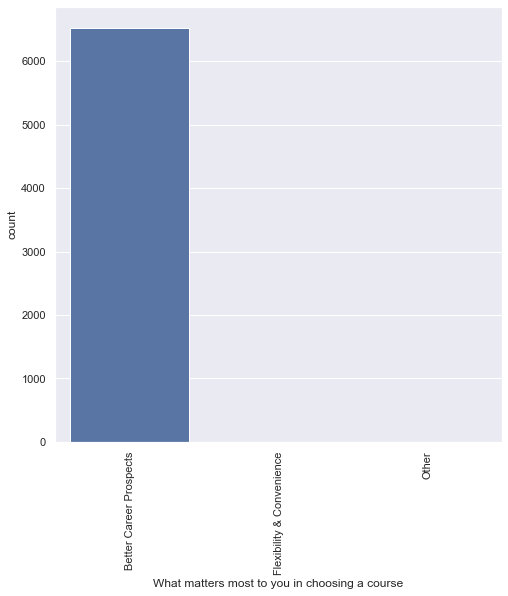

In [22]:
s=sns.countplot(lead_Data_Master['What matters most to you in choosing a course'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- As we can see , almost all the values are "Better Career Prospects", we can replace null values with the same.

In [23]:
lead_Data_Master['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

#### What is your current occupation:- Indicates whether the customer is a student, umemployed or employed.

- Let's describe the variable

In [24]:
lead_Data_Master['What is your current occupation'].describe()

count     6550      
unique    6         
top       Unemployed
freq      5600      
Name: What is your current occupation, dtype: object

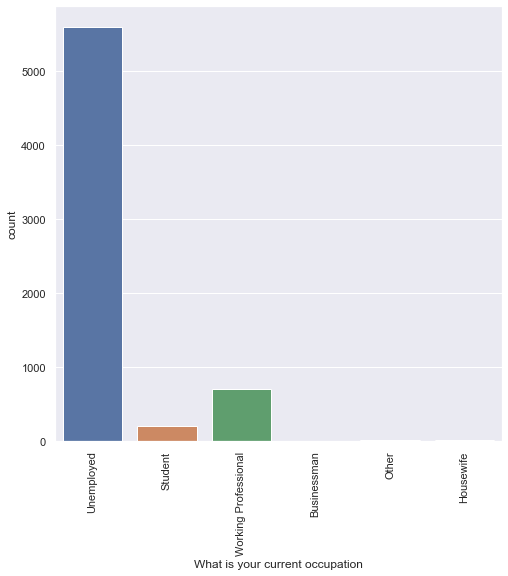

In [25]:
s=sns.countplot(lead_Data_Master['What is your current occupation'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see almost all the customers are Unemployed. So, we are replacing null value with the same.

In [26]:
lead_Data_Master['What is your current occupation'].fillna('Unemployed', inplace=True)

#### Country:- indicates country of the customer

- Let's describe the country

In [27]:
lead_Data_Master['Country'].describe()

count     6779 
unique    38   
top       India
freq      6492 
Name: Country, dtype: object

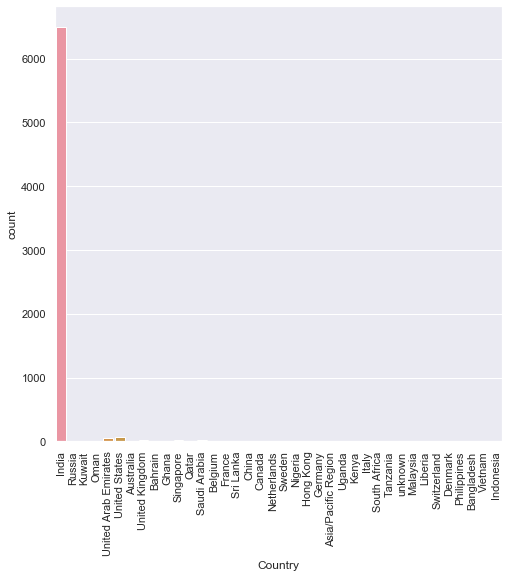

In [28]:
s=sns.countplot(lead_Data_Master['Country'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Since, most of the customers are Indian, we can replace the null value with India.

In [29]:
lead_Data_Master['Country'].fillna('India', inplace=True)

- Let's see the status of the null value percenatge.

In [30]:
round(100*(lead_Data_Master.isnull().sum()/len(lead_Data_Master.index)),2)

Prospect ID                                     0.0000
Lead Number                                     0.0000
Lead Origin                                     0.0000
Lead Source                                     0.3900
Do Not Email                                    0.0000
Do Not Call                                     0.0000
Converted                                       0.0000
TotalVisits                                     1.4800
Total Time Spent on Website                     0.0000
Page Views Per Visit                            1.4800
Last Activity                                   1.1100
Country                                         0.0000
Specialization                                  0.0000
What is your current occupation                 0.0000
What matters most to you in choosing a course   0.0000
Search                                          0.0000
Magazine                                        0.0000
Newspaper Article                               0.0000
X Educatio

- Here, we can see the total 4 variables are there with very less percentage of null value. So, We can remove those rows.

In [31]:
lead_Data_Master.dropna(inplace=True)

In [32]:
lead_Data_Final=lead_Data_Master

In [33]:
round(100*(lead_Data_Master.isnull().sum()/len(lead_Data_Master.index)),2)

Prospect ID                                     0.0000
Lead Number                                     0.0000
Lead Origin                                     0.0000
Lead Source                                     0.0000
Do Not Email                                    0.0000
Do Not Call                                     0.0000
Converted                                       0.0000
TotalVisits                                     0.0000
Total Time Spent on Website                     0.0000
Page Views Per Visit                            0.0000
Last Activity                                   0.0000
Country                                         0.0000
Specialization                                  0.0000
What is your current occupation                 0.0000
What matters most to you in choosing a course   0.0000
Search                                          0.0000
Magazine                                        0.0000
Newspaper Article                               0.0000
X Educatio

#### Now, the dataset is looking fine.

### Checking for outliers all numerical data and treating them

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_DF = lead_Data_Master.select_dtypes(include=numerics)
numeric_DF.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

### TotalVisits

In [35]:
lead_Data_Master['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9074.0000
mean    3.4560   
std     4.8588   
min     0.0000   
5%      0.0000   
25%     1.0000   
50%     3.0000   
75%     5.0000   
90%     7.0000   
95%     10.0000  
99%     17.0000  
max     251.0000 
Name: TotalVisits, dtype: float64

- we can see the outlier here. So, let's plot the box plot.

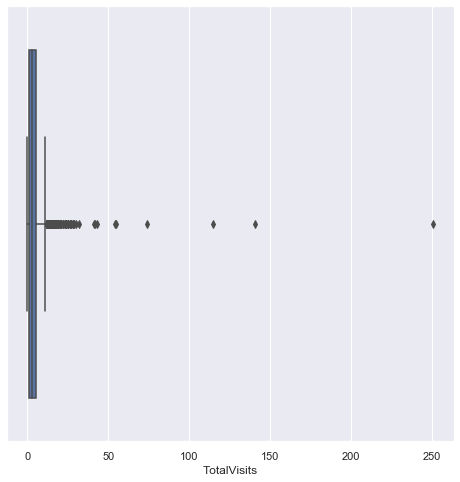

In [36]:
sns.boxplot(lead_Data_Master['TotalVisits'])
plt.show()

- Here, we can see the outliers. So, we will treat them.

In [37]:
Q1=lead_Data_Master['TotalVisits'].quantile(0.05)
Q3=lead_Data_Master['TotalVisits'].quantile(0.95)
lead_Data_Master['TotalVisits'][lead_Data_Master['TotalVisits'] <= Q1] = Q1
lead_Data_Master['TotalVisits'][lead_Data_Master['TotalVisits'] >= Q3] = Q3

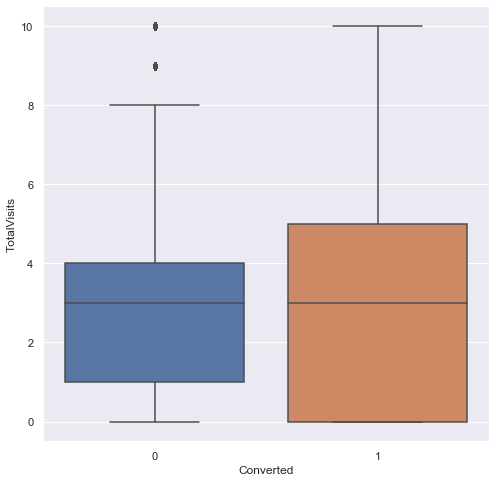

In [38]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_Data_Master)
plt.show()

- After removing outliers, we can see this feature will be useful for improving leading score.

### Total Time Spent on Website

In [39]:
lead_Data_Master['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9074.0000
mean    482.8875 
std     545.2566 
min     0.0000   
5%      0.0000   
25%     11.0000  
50%     246.0000 
75%     922.7500 
90%     1373.0000
95%     1557.0000
99%     1839.0000
max     2272.0000
Name: Total Time Spent on Website, dtype: float64

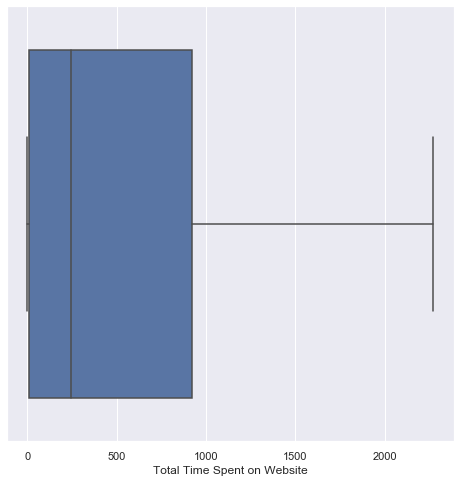

In [40]:
sns.boxplot(lead_Data_Master['Total Time Spent on Website'])
plt.show()

- Here, we are not getting any outliers. So, we will check the converted score as per this feature.

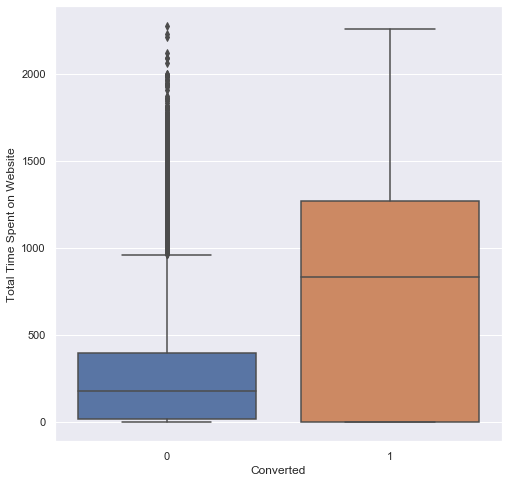

In [41]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_Data_Master)
plt.show()

- We can see, website is an important criteria for improving conversion score.

### Page Views Per Visit

In [42]:
lead_Data_Master['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9074.0000
mean    2.3702   
std     2.1609   
min     0.0000   
5%      0.0000   
25%     1.0000   
50%     2.0000   
75%     3.2000   
90%     5.0000   
95%     6.0000   
99%     9.0000   
max     55.0000  
Name: Page Views Per Visit, dtype: float64

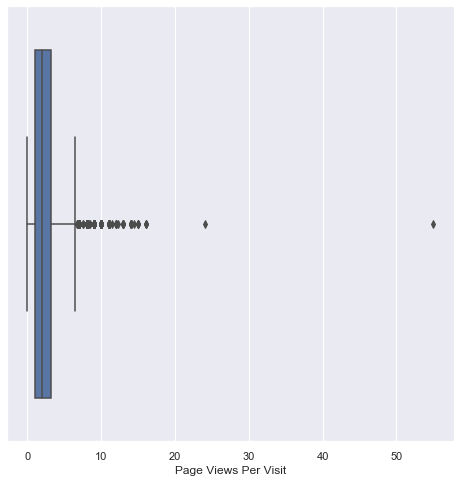

In [43]:
sns.boxplot(lead_Data_Master['Page Views Per Visit'])
plt.show()

- Here, we can see the outliers. So, we will treat them.

In [44]:
Q1=lead_Data_Master['Page Views Per Visit'].quantile(0.05)
Q3=lead_Data_Master['Page Views Per Visit'].quantile(0.95)
lead_Data_Master['Page Views Per Visit'][lead_Data_Master['Page Views Per Visit'] <= Q1] = Q1
lead_Data_Master['Page Views Per Visit'][lead_Data_Master['Page Views Per Visit'] >= Q3] = Q3

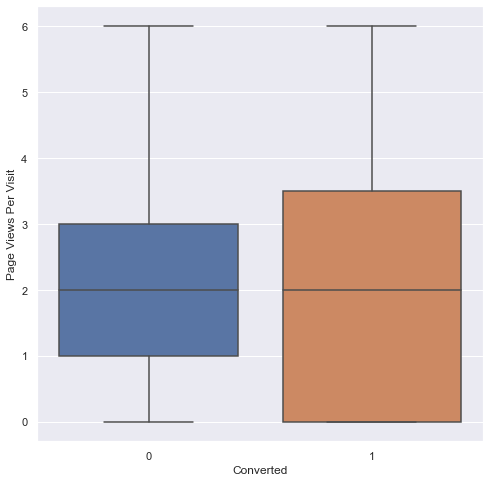

In [45]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_Data_Master)
plt.show()

- We can see, Page is also an important criteria for improving converted score.



##### Now we have all filtered variables. But, we need to find out the most relevant variables, which will be used for predicting the high convrted score. So, We can select these relevant features by using "Converted" variable. 

- Here, Converted variable is the target variable, which indicates whether a lead has successfully converted or not.

- So, Lets start with the analysis of all the variables one by one.


##### Since  Lead Number are not required for predicting the lead score, it can be reomved. 

In [46]:
lead_Data_Master=lead_Data_Master.drop(['Lead Number'],1)

#### Lead Origin feature

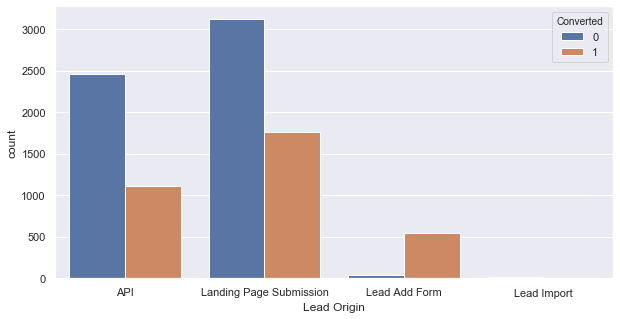

In [47]:
plt.figure(figsize = (10,5))
sns.countplot(x='Lead Origin',hue='Converted',data=lead_Data_Master)
plt.show()

- From above plot, API, Landing Page Submission and Lead Add Form are having impact on conversion rate. 
- Even though, API and Landing Page Submission are having less 'Converted' rate, but the amount of lead is being generated can be considered.
- In case of Lead Add Form, we can clearly see the amount of 'Converted' is less but the converted rate is more. For 'Lead Import', the converted rate is very low.
- So, we will consider these 3 values to improve conversion rate.

#### Lead Source Feature

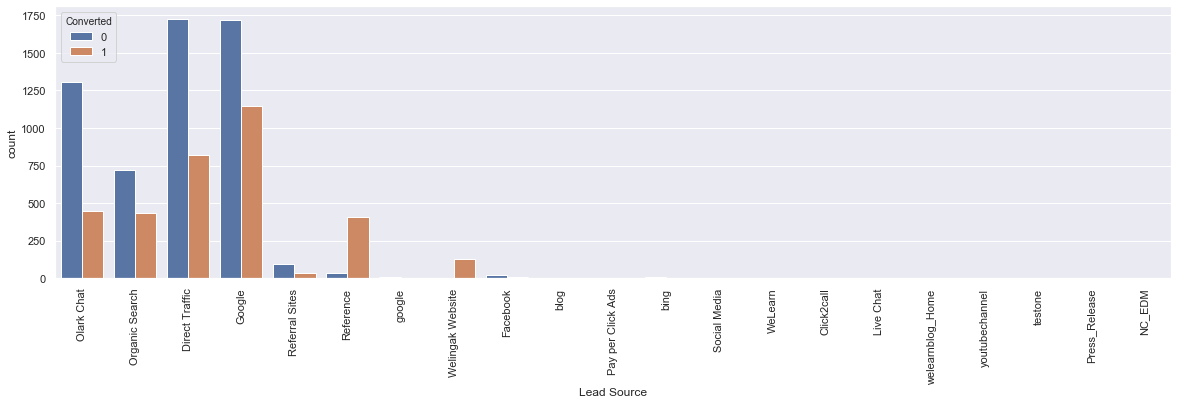

In [48]:
plt.figure(figsize = (20,5))
s=sns.countplot(x='Lead Source',hue='Converted',data=lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see there are some repeated variables like Google. So, it can be merged. 
- The sources like blog, bing, Click2Call, etc. are ahving very less and similar amount of converted rate. So, these variables can also be merged by creating a new value say 'Othersources'.

In [49]:
lst_others=['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home'
            ,'youtubechannel','testone','Press_Release','NC_EDM']
            
lead_Data_Master['Lead Source']=lead_Data_Master['Lead Source'].apply(lambda x: 'Google' if x=='google' else x)
lead_Data_Master['Lead Source']=lead_Data_Master['Lead Source'].apply(lambda x: 'Other sources' if x in lst_others else x)

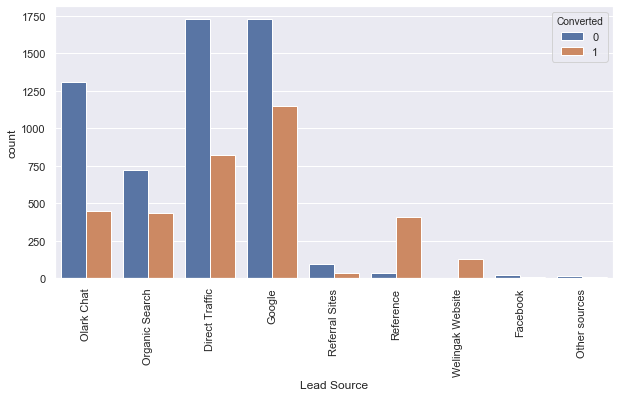

In [50]:
plt.figure(figsize = (10,5))
s=sns.countplot(x='Lead Source',hue='Converted',data=lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see Direct Traffic and Google can be helpful to increase conversion rate.
- The conversion rate in case of reference and welingak website is high.
- So, to improve overall lead conversion rate, the company needs to focus on increasing lead conversion rate of olark chat, organic search, direct traffic, and google. More Leads are generated from reference and welingak website.

#### Do Not Email and Do Not Call

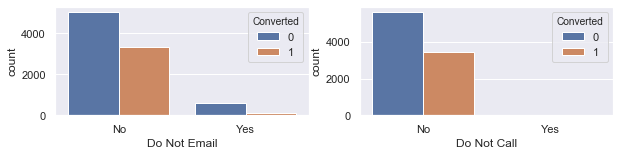

In [51]:
fig, axes = plt.subplots(1,2,figsize = (10,2))
sns.countplot(x='Do Not Email',hue='Converted',data=lead_Data_Master,ax = axes[0])
sns.countplot(x='Do Not Call',hue='Converted',data=lead_Data_Master,ax = axes[1])

plt.show()

#### Country

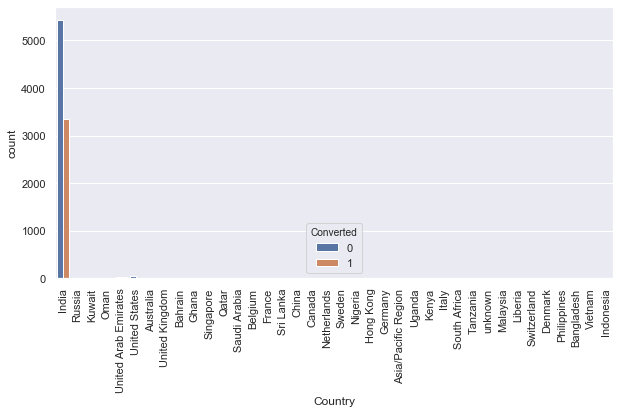

In [52]:
plt.figure(figsize = (10,5))
s=sns.countplot(x='Country',hue='Converted',data=lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [53]:
lead_Data_Master.drop('Country',1,inplace=True)

- We can see, almost all the leads are from india. So, we can remove the country feature.

### Last Activity

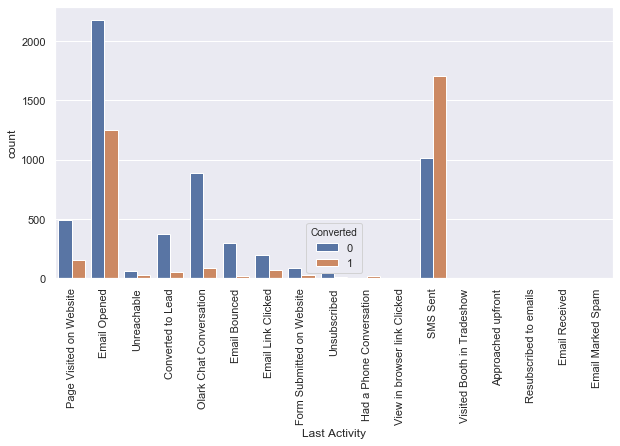

In [54]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- here, Many of the values are having much impact. So, we group them into one value.


In [55]:
lst_others=['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront',
            'Resubscribed to emails','Email Received','Email Marked Spam'
            ,'Unsubscribed']
lead_Data_Master['Last Activity']=lead_Data_Master['Last Activity'].apply(lambda x: 'Other Last Activity' if x in lst_others else x)

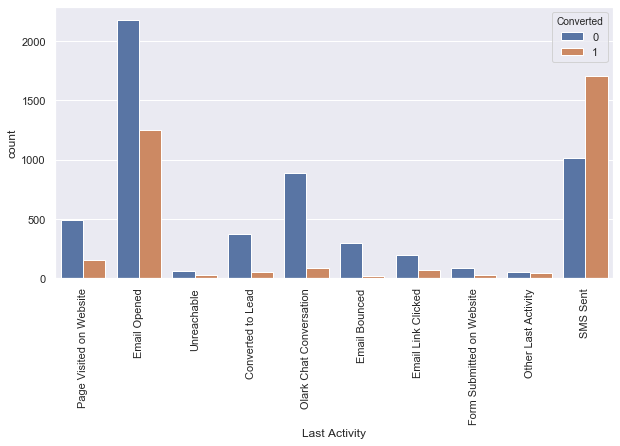

In [56]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see most of the leads do the activities like Email and SMS sending.
- Conversion rate is higher in case of SMS sent activity

### Specialization

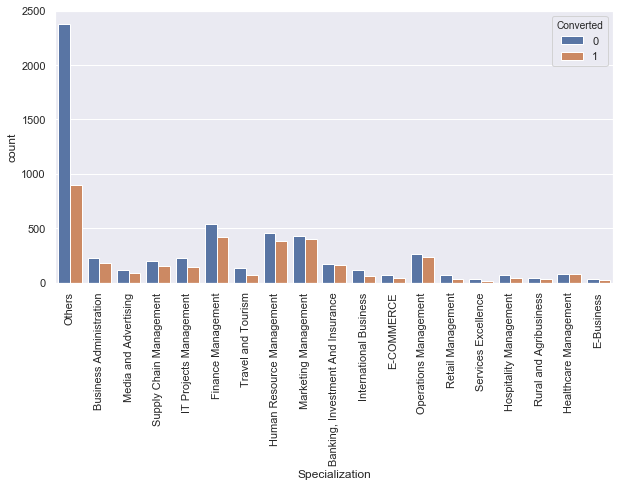

In [57]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Specialization", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Most of the leads are having specialisation in other program.

### Current occupation

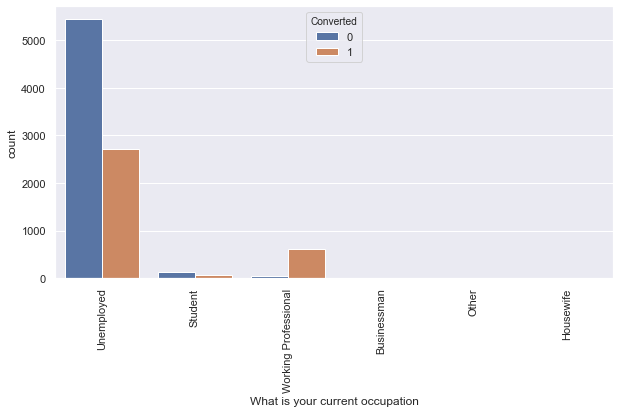

In [58]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Working Professional are more likely to join the courses. So, our focus should be more on them.
- For Unemployed leads, the conversion rate is less  but the number of joinees are more.

### Choosing a course

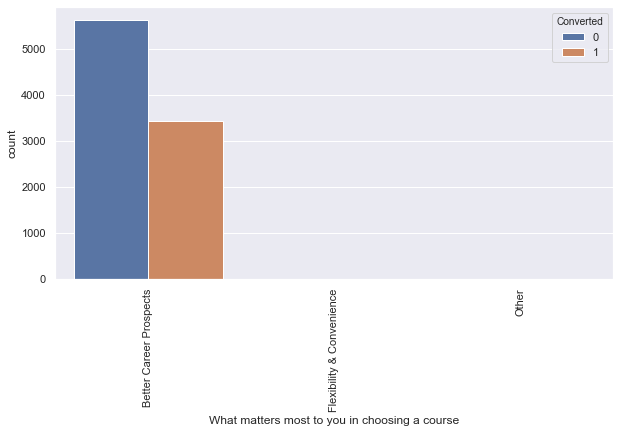

In [59]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [60]:
lead_Data_Master.drop('What matters most to you in choosing a course',1,inplace=True)

- Here, All the leads have given the same reason. It doesn't impact on the converted rate. So, we will remove it.   

### Search

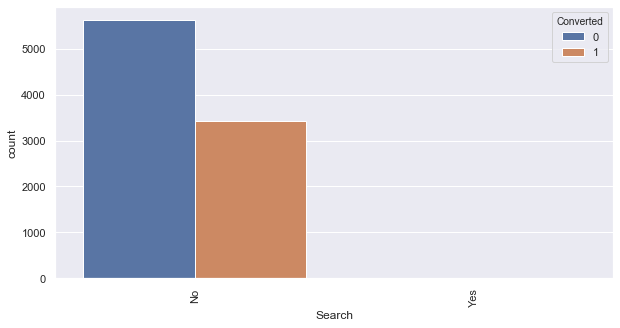

In [61]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Search", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [62]:
lead_Data_Master.drop('Search',1,inplace=True)

- Here, most of the leads are not searching. So, it can also be removed. 

### Magazine

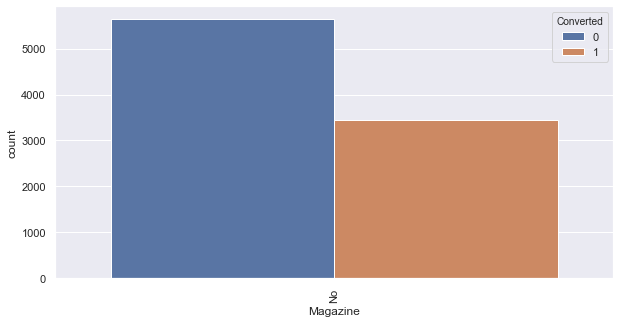

In [63]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Magazine", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [64]:
lead_Data_Master.drop('Magazine',1,inplace=True)

- Here, most of the leads are not seeing the ad in magazines. So, it can also be removed. 

### Newspaper Article

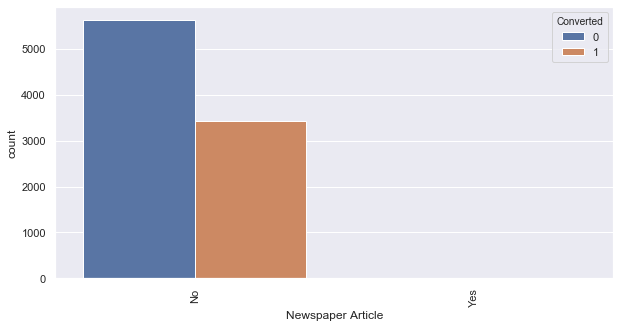

In [65]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [66]:
lead_Data_Master.drop('Newspaper Article',1,inplace=True)

- It can also be removed.

### X Education Forums

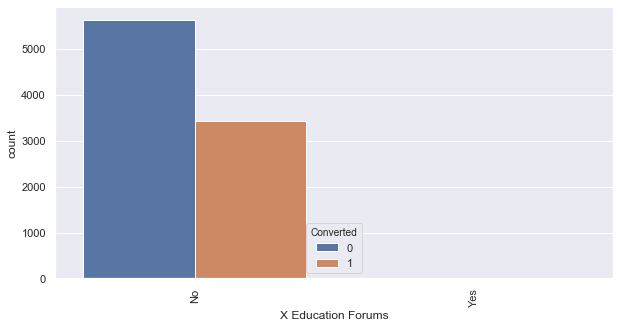

In [67]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [68]:
lead_Data_Master.drop('X Education Forums',1,inplace=True)

It can also be removed.

### Newspaper

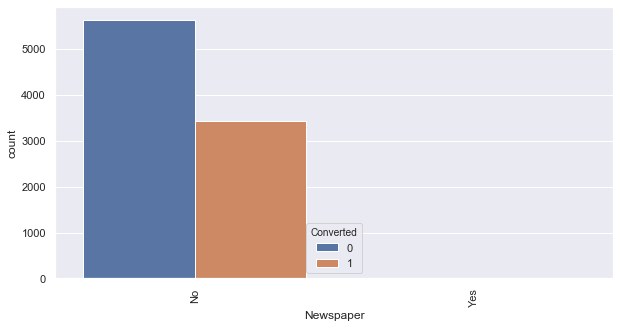

In [69]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Newspaper", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [70]:
lead_Data_Master.drop('Newspaper',1,inplace=True)

- It can also be removed.

### Digital Advertisement 

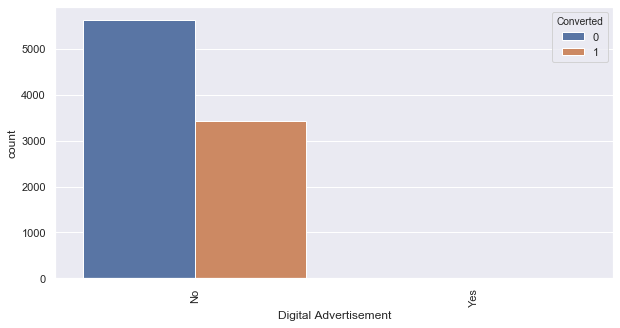

In [71]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [72]:
lead_Data_Master.drop('Digital Advertisement',1,inplace=True)

It can also be removed.

### Through Recommendations

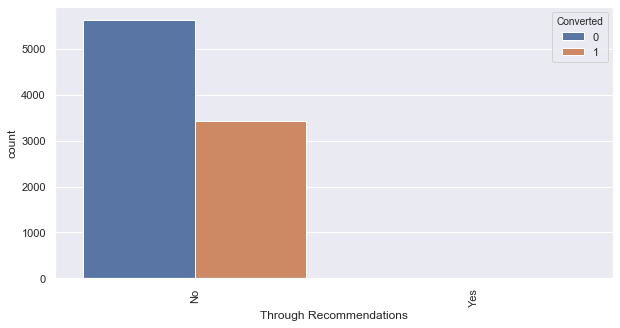

In [73]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [74]:
lead_Data_Master.drop('Through Recommendations',1,inplace=True)

- It can also be removed.

### Receive More Updates About Our Courses

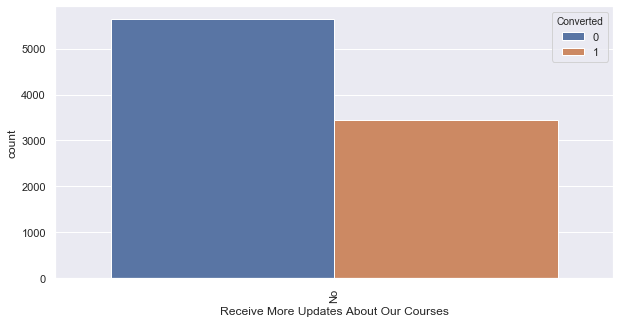

In [75]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [76]:
lead_Data_Master.drop('Receive More Updates About Our Courses',1,inplace=True)

- It can also be removed.

### Update me on Supply Chain Content

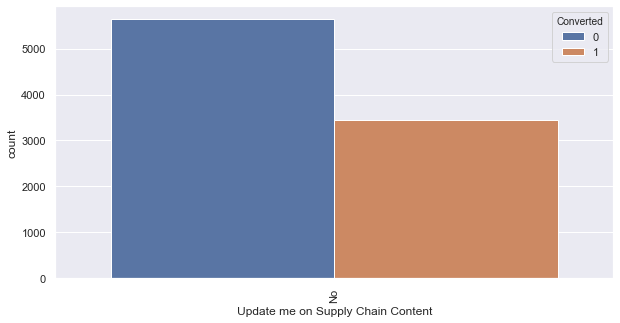

In [77]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [78]:
lead_Data_Master.drop('Update me on Supply Chain Content',1,inplace=True)

- It can be removed.

### Get updates on DM Content 

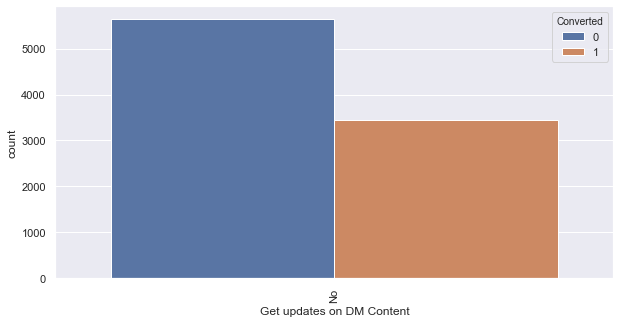

In [79]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [80]:
lead_Data_Master.drop('Get updates on DM Content',1,inplace=True)

- It can be removed.

### City

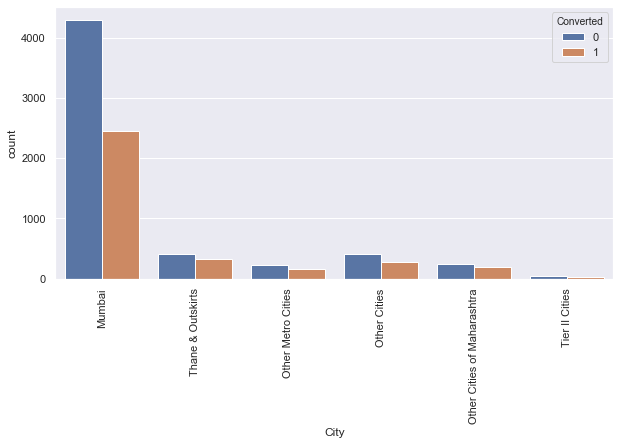

In [81]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "City", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Most of the leads are from Mumbai.

### I agree to pay the amount through cheque

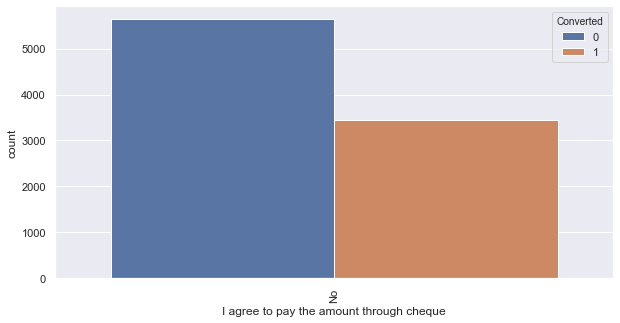

In [82]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [83]:
lead_Data_Master.drop('I agree to pay the amount through cheque',1,inplace=True)

- It can be removed as most of the entries are NO.

### A free copy of Mastering The Interview

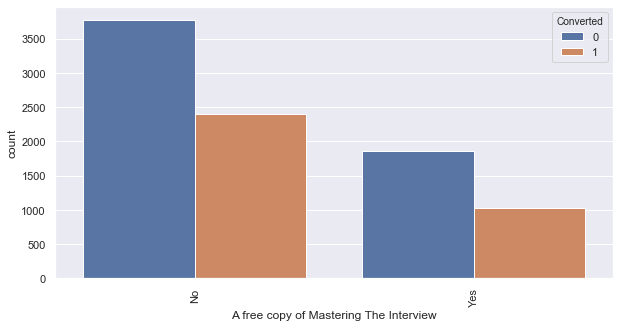

In [84]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [85]:
lead_Data_Master.drop('A free copy of Mastering The Interview',1,inplace=True)

- Here also, maximum entries are No. So, it can also be removed.

### Last Notable Activity

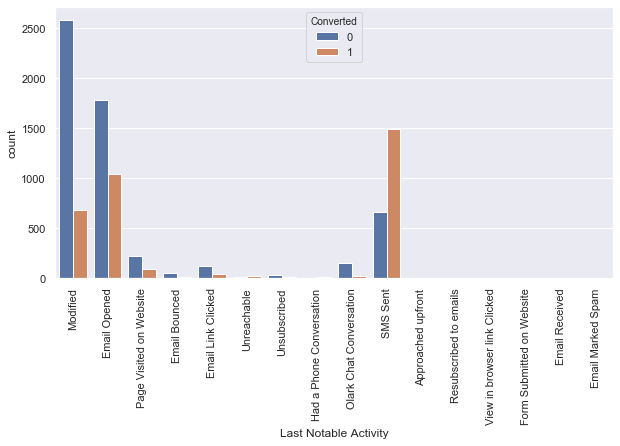

In [86]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, we can see most of the activities are being happened by leads. So, these can be grouped into one value.

In [87]:
lst_others=['Email Bounced', 'Unreachable','Unsubscribed','Had a Phone Conversation',
            'Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received',
            'Email Marked Spam']
lead_Data_Master['Last Notable Activity']=lead_Data_Master['Last Notable Activity'].apply(lambda x: 'Other LastNotableActivity' if x in lst_others else x)

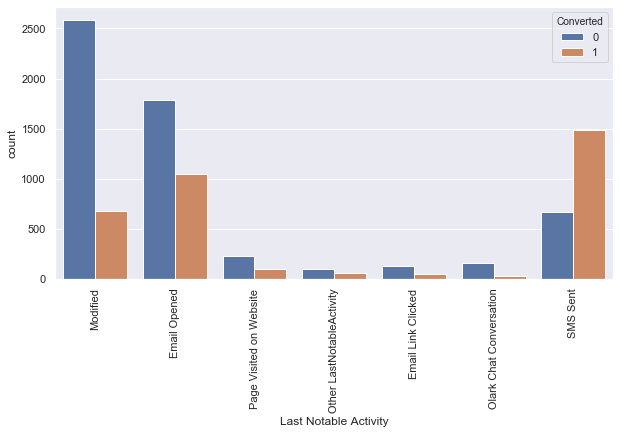

In [88]:
plt.figure(figsize = (10,5))
s=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_Data_Master)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Here, most of the leads opened the email and sent the message.

### After doing analysis, we will see the final set of features, which all are required for the further analysis and building the model.

In [89]:
Lead_Data_Final2=lead_Data_Master
lead_Data_Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [90]:
print('The total number of fetaures are: ',lead_Data_Master.shape[1])

The total number of fetaures are:  14


- Let's apply binary conversion of the below features

In [91]:
# Converting Yes to 1 and No to 0
lead_Data_Master['Do Not Email']=lead_Data_Master['Do Not Email'].map({'Yes':1,'No':0})
lead_Data_Master['Do Not Call']=lead_Data_Master['Do Not Call'].map({'Yes':1, 'No':0})

### Dummy Variable Creation

In [92]:
lead_Data_Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [93]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
LeadOrigin = pd.get_dummies(lead_Data_Master['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,LeadOrigin],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
LeadSource = pd.get_dummies(lead_Data_Master['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,LeadSource],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
LastActivity = pd.get_dummies(lead_Data_Master['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,LastActivity],axis=1)

# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
Specialization = pd.get_dummies(lead_Data_Master['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,Specialization],axis=1)

# Creating a dummy variable for the variable 'What is your current occupation' and dropping the first one.
choosing_a_course = pd.get_dummies(lead_Data_Master['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,choosing_a_course],axis=1)

# Creating a dummy variable for the variable 'Receive More Updates About Our Courses' and dropping the first one.
City = pd.get_dummies(lead_Data_Master['City'],prefix='City',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,City],axis=1)

# Creating a dummy variable for the variable 'Receive More Updates About Our Courses' and dropping the first one.
Notable_Activity = pd.get_dummies(lead_Data_Master['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
lead_Data_Master = pd.concat([lead_Data_Master,Notable_Activity],axis=1)

#### Dropping repeated variables

- We can drop the original variables, for which we created dummy variables

In [94]:
lead_Data_Master=lead_Data_Master.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
                                        'What is your current occupation','City',
                                        'Last Notable Activity'],1)

In [95]:
lead_Data_Master.shape

(9074, 61)

### Splitting Data into train and test data set

In [96]:
# Putting feature variable to X
X = lead_Data_Master.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other LastNotableActivity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0000,0,0.0000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0000,674,2.5000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,2.0000,1532,2.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0000,305,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,2.0000,1428,1.0000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [97]:
y=lead_Data_Master['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting the data into train and test

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Checking for all the numerical data for Feature Standardisation

In [99]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_DF = X_train.select_dtypes(include=numerics)
numeric_DF.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')


### Feature Standardisatio/Scaling

- Normalising continuous features

In [100]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [101]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other LastNotableActivity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,0,-0.4328,-0.1603,-0.1550,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1012,1,0,-0.4328,-0.5400,-0.1550,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9226,0,0,-1.1503,-0.8887,-1.2655,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4750,0,0,-0.4328,1.6433,-0.1550,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
7987,0,0,0.6435,2.0176,0.1226,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0


#### Checking the converted rate

In [102]:
# First, let's look at the overall Conversion rate.
lead_Data_Master['Converted'].value_counts().to_frame()

,Converted
0,5639
1,3435


Conversion rate from leads to paying customer:  38.0 %
Non coversion rate:  62.0 %
The ratio is 2.0


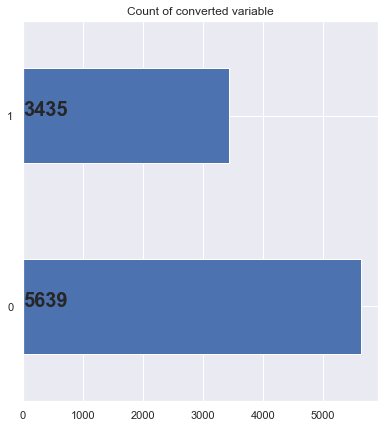

In [103]:
print('Conversion rate from leads to paying customer: ',round(100*lead_Data_Master['Converted'].sum()/len(lead_Data_Master['Converted'])),'%')
print('Non coversion rate: ',100-round(100*lead_Data_Master['Converted'].sum()/len(lead_Data_Master['Converted'])),'%')
print('The ratio is',round((lead_Data_Master["Converted"].value_counts().values[0]/lead_Data_Master["Converted"].value_counts().values[1])))
plt.figure(figsize=(14,7))
plt.subplot(122)
ax = lead_Data_Master["Converted"].value_counts().plot(kind="barh")

for i,j in enumerate(lead_Data_Master["Converted"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of converted variable")
plt.show()

In [104]:
converted=round((sum(lead_Data_Master['Converted'])/len(lead_Data_Master['Converted']))*100,2)
print("The total leads conversion rate as of now: ",converted,"%")

The total leads conversion rate as of now:  37.86 %


### Model Building Phase

- Running First Training Model

In [105]:
import statsmodels.api as sm

In [106]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.9
Date:                Mon, 23 Nov 2020   Deviance:                       5081.7
Time:                        21:58:43   Pearson chi2:                 6.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3939      1.278     -0.308      0.758      -2.899       2.111
Do Not Email                                            -1.6767      0.219     -7.644      0.000      -2.107      -1.247
Do Not Call                                             21.5650   3.13e+04      0.001      0.999   -6.13e+04    6.13e+04
TotalVisits                                              0.2940      0.057      5.176      0.000       0.183       0.405
Total Time Spent on Website                              1.1088      0.042     26.702      0.000       1.027       1.190
Page Views Per Visit                                    -0.3194      0.064     -5.027      0.000      -0.444      -0.195
Lead Origin_Landing Page Submission                     -0.9154      0.138     -6.628      0.000      -1.186      -0.645
Lead Origin_Lead Add Form                                1.0646      1.016      1.048      0.294      -0.926       3.055
Lead Origin_Lead Import                                 22.8559   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.7094   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.3387      0.098      3.454      0.001       0.147       0.531
Lead Source_Olark Chat                                   1.3014      0.163      7.969      0.000       0.981       1.621
Lead Source_Organic Search                               0.1502      0.133      1.126      0.260      -0.111       0.412
Lead Source_Other sources                                0.7912      0.654      1.210      0.226      -0.490       2.073
Lead Source_Reference                                    2.4687      1.040      2.374      0.018       0.430       4.507
Lead Source_Referral Sites                               0.0012      0.355      0.003      0.997      -0.695       0.697
Lead Source_Welingak Website                             5.0421      1.250      4.034      0.000       2.592       7.492
Last Activity_Email Bounced                             -0.0448      0.531     -0.084      0.933      -1.086       0.997
Last Activity_Email Link Clicked                         0.7222      0.432      1.672      0.095      -0.124       1.569
Last Activity_Email Opened                               0.9387      0.255      3.677      0.000       0.438       1.439
Last Activity_Form Submitted on Website                  0.3440      0.401      0.858      0.391      -0.442       1.129
Last Activity_Olark Chat Conversation                   -0.3815      0.288     -1.324      0.185      -0.946       0.183
Last Activity_Other Last Activity                        1

### Feature Selection Using RFE

In [107]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [108]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)  ## we will build our model by using 15 variables
rfe=rfe.fit(X_train,y_train)

In [109]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True])

In [110]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Other sources', False, 24),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 8),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Last Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent',

In [111]:
col=X_train.columns[rfe.support_]

In [112]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other sources',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations

- Running second model 

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.6
Date:                Mon, 23 Nov 2020   Deviance:                       5221.2
Time:                        21:58:52   Pearson chi2:                 6.44e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3785      0.124     -3.061      0.002      -0.621      -0.136
Do Not Email                                            -1.9980      0.192    -10.411      0.000      -2.374      -1.622
Total Time Spent on Website                              1.1059      0.040     27.331      0.000       1.027       1.185
Lead Origin_Landing Page Submission                     -1.1207      0.128     -8.758      0.000      -1.371      -0.870
Lead Origin_Lead Add Form                                1.4816      0.896      1.653      0.098      -0.275       3.238
Lead Origin_Lead Import                                  1.0670      0.476      2.242      0.025       0.134       2.000
Lead Source_Olark Chat                                   1.1684      0.123      9.489      0.000       0.927       1.410
Lead Source_Reference                                    1.9684      0.920      2.140      0.032       0.165       3.772
Lead Source_Welingak Website                             4.6092      1.155      3.992      0.000       2.346       6.872
Last Activity_Olark Chat Conversation                   -1.3868      0.165     -8.412      0.000      -1.710      -1.064
Last Activity_Other Last Activity                        1.0459      0.363      2.882      0.004       0.335       1.757
Specialization_Others                                   -1.1609      0.124     -9.325      0.000      -1.405      -0.917
What is your current occupation_Housewife               22.9325   1.51e+04      0.002      0.999   -2.95e+04    2.96e+04
What is your current occupation_Working Professional     2.5888      0.193     13.444      0.000       2.211       2.966
Last Notable Activity_Other LastNotableActivity          1.2778      0.305      4.185      0.000       0.679       1.876
Last Notable Activity_SMS Sent                           1.6797      0.081     20.858      0.000       1.522       1.837
========================================================================================================================
"""

- Here, the p-value of all the features should be less than 0.05. So, we will remove the 'Tags_invalid number'.

In [114]:
col=col.drop('What is your current occupation_Housewife',1)

- Running third model after removing 'Tags_invalid number'

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.2
Date:                Mon, 23 Nov 2020   Deviance:                       5230.4
Time:                        21:58:52   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3721      0.124     -3.012      0.003      -0.614      -0.130
Do Not Email                                            -2.0004      0.192    -10.426      0.000      -2.376      -1.624
Total Time Spent on Website                              1.1051      0.040     27.344      0.000       1.026       1.184
Lead Origin_Landing Page Submission                     -1.1209      0.128     -8.770      0.000      -1.371      -0.870
Lead Origin_Lead Add Form                                1.4783      0.896      1.650      0.099      -0.278       3.235
Lead Origin_Lead Import                                  1.0622      0.476      2.232      0.026       0.129       1.995
Lead Source_Olark Chat                                   1.1671      0.123      9.483      0.000       0.926       1.408
Lead Source_Reference                                    1.9842      0.920      2.157      0.031       0.181       3.787
Lead Source_Welingak Website                             4.6118      1.155      3.994      0.000       2.349       6.875
Last Activity_Olark Chat Conversation                   -1.3888      0.165     -8.424      0.000      -1.712      -1.066
Last Activity_Other Last Activity                        1.0445      0.363      2.878      0.004       0.333       1.756
Specialization_Others                                   -1.1657      0.124     -9.373      0.000      -1.409      -0.922
What is your current occupation_Working Professional     2.5841      0.193     13.421      0.000       2.207       2.961
Last Notable Activity_Other LastNotableActivity          1.2752      0.305      4.176      0.000       0.677       1.874
Last Notable Activity_SMS Sent                           1.6751      0.080     20.813      0.000       1.517       1.833
========================================================================================================================
"""

- we will remove the 'Tags_wrong number given	'.



In [116]:
col=col.drop('Lead Origin_Lead Add Form',1)

- Running 4th model after removing 'Tags_wrong number given	'

In [117]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.7
Date:                Mon, 23 Nov 2020   Deviance:                       5233.4
Time:                        21:58:52   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3528      0.123     -2.867      0.004      -0.594      -0.112
Do Not Email                                            -2.0015      0.192    -10.432      0.000      -2.378      -1.625
Total Time Spent on Website                              1.1029      0.040     27.332      0.000       1.024       1.182
Lead Origin_Landing Page Submission                     -1.1391      0.127     -8.937      0.000      -1.389      -0.889
Lead Origin_Lead Import                                  1.0457      0.476      2.197      0.028       0.113       1.979
Lead Source_Olark Chat                                   1.1598      0.123      9.441      0.000       0.919       1.401
Lead Source_Reference                                    3.4476      0.243     14.178      0.000       2.971       3.924
Lead Source_Welingak Website                             6.0811      0.735      8.271      0.000       4.640       7.522
Last Activity_Olark Chat Conversation                   -1.3926      0.165     -8.448      0.000      -1.716      -1.070
Last Activity_Other Last Activity                        1.0434      0.363      2.876      0.004       0.332       1.755
Specialization_Others                                   -1.1779      0.124     -9.481      0.000      -1.421      -0.934
What is your current occupation_Working Professional     2.5812      0.193     13.401      0.000       2.204       2.959
Last Notable Activity_Other LastNotableActivity          1.2730      0.305      4.169      0.000       0.674       1.871
Last Notable Activity_SMS Sent                           1.6762      0.080     20.827      0.000       1.518       1.834
========================================================================================================================
"""

In [118]:
col=col.drop('Lead Origin_Lead Import',1)

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.9
Date:                Mon, 23 Nov 2020   Deviance:                       5237.7
Time:                        21:58:52   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3066      0.121     -2.525      0.012      -0.545      -0.069
Do Not Email                                            -2.0012      0.192    -10.437      0.000      -2.377      -1.625
Total Time Spent on Website                              1.0945      0.040     27.310      0.000       1.016       1.173
Lead Origin_Landing Page Submission                     -1.1794      0.126     -9.333      0.000      -1.427      -0.932
Lead Source_Olark Chat                                   1.1308      0.122      9.278      0.000       0.892       1.370
Lead Source_Reference                                    3.4088      0.242     14.057      0.000       2.933       3.884
Lead Source_Welingak Website                             6.0536      0.735      8.235      0.000       4.613       7.494
Last Activity_Olark Chat Conversation                   -1.3988      0.165     -8.486      0.000      -1.722      -1.076
Last Activity_Other Last Activity                        1.0397      0.363      2.868      0.004       0.329       1.750
Specialization_Others                                   -1.2030      0.124     -9.692      0.000      -1.446      -0.960
What is your current occupation_Working Professional     2.5825      0.193     13.412      0.000       2.205       2.960
Last Notable Activity_Other LastNotableActivity          1.2652      0.305      4.144      0.000       0.667       1.863
Last Notable Activity_SMS Sent                           1.6707      0.080     20.791      0.000       1.513       1.828
========================================================================================================================
"""

-  From the summary table, we can see all the features has p-value<0.05. So, now we can go fr the prediction.

#### Getting the predicted values on the train set

In [120]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

3009   0.1596
1012   0.1925
9226   0.2056
4750   0.8790
7987   0.6731
1281   0.7664
2880   0.0794
4971   0.9692
7536   0.8196
1248   0.6336
dtype: float64

In [121]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15957292, 0.19253055, 0.20564221, 0.87902464, 0.67309311,
       0.76638632, 0.07939516, 0.969166  , 0.81956463, 0.63355616])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [122]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.1596,3009
1,0,0.1925,1012
2,0,0.2056,9226
3,1,0.8790,4750
4,1,0.6731,7987


#### Creating new column 'predicted' with 1 if Converted_prob>0.5 and 0 if Converted_prob<0.5

In [123]:
y_train_pred_final["Predicted"]=y_train_pred_final["Converted_prob"].apply(lambda x: 1 if x>0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.1596,3009,0
1,0,0.1925,1012,0
2,0,0.2056,9226,0
3,1,0.8790,4750,1
4,1,0.6731,7987,1


### Checking the overall accuracy with confusion matrix

In [124]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [125]:
# Confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3444  461]
 [ 735 1711]]


In [126]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.8116831994961423


In [127]:
# Let's check the classification report
print(classification_report(y_train_pred_final.Converted,y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3905
           1       0.79      0.70      0.74      2446

    accuracy                           0.81      6351
   macro avg       0.81      0.79      0.80      6351
weighted avg       0.81      0.81      0.81      6351



### Checking VIFs

In [128]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,2.0400
8,Specialization_Others,1.9500
6,Last Activity_Olark Chat Conversation,1.4400
10,Last Notable Activity_Other LastNotableActivity,1.4200
11,Last Notable Activity_SMS Sent,1.4200
2,Lead Origin_Landing Page Submission,1.3500
7,Last Activity_Other Last Activity,1.3300
1,Total Time Spent on Website,1.3000
0,Do Not Email,1.2200
4,Lead Source_Reference,1.2200


#### All variables have a good value of VIF means < 5. So, we can proceed with making predictions using this model only.

### Metrics beyond simply accuracy

In [130]:
TP=confusion[1,1] # true positive
TN=confusion[0,0] # true negative
FP=confusion[0,1] # False positive
FN=confusion[1,0] # False negative

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6995094031071136

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.8819462227912932

In [133]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.11805377720870679


The FPR should be low.

In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.7877532228360957


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8241206030150754


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

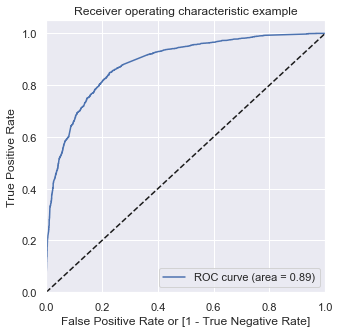

In [138]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- Here, ROC curve area is high. So, we can definitly proceed with this prediction.

### Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [139]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.1596,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.1925,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.2056,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.8790,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.6731,7987,1,1,1,1,1,1,1,1,0,0,0


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

         prob  accuracy  sensi  speci
0.0000 0.0000 0.3851    1.0000 0.0000
0.1000 0.1000 0.6026    0.9706 0.3721
0.2000 0.2000 0.7449    0.9174 0.6369
0.3000 0.3000 0.8005    0.8491 0.7700
0.4000 0.4000 0.8077    0.7735 0.8292
0.5000 0.5000 0.8117    0.6995 0.8819
0.6000 0.6000 0.7972    0.5912 0.9262
0.7000 0.7000 0.7854    0.5200 0.9516
0.8000 0.8000 0.7648    0.4358 0.9708
0.9000 0.9000 0.7172    0.2841 0.9885


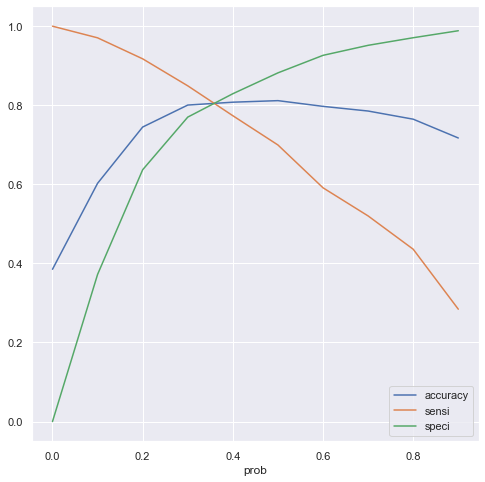

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Here, the optimum point is nearer to 0.35. So, i will consider the cutoff is 0.35.  

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.1596,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.1925,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.2056,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.8790,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.6731,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [143]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8047551566682413

#### confusion matrix after final prediction

In [144]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3121,  784],
       [ 456, 1990]], dtype=int64)

In [145]:
# Let's check the classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3905
           1       0.72      0.81      0.76      2446

    accuracy                           0.80      6351
   macro avg       0.79      0.81      0.80      6351
weighted avg       0.81      0.80      0.81      6351



#### As per the classification report, it's quite clear that the precision & recall is quite good for the minority class i.e. Converted leads.

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8135731807031888

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.7992317541613316

In [149]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20076824583866837


In [150]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7173756308579669


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8725188705619235


### Precision and Recall

- Looking at the confusion matrix again

In [152]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3444,  461],
       [ 735, 1711]], dtype=int64)

#### Precision
TP / TP + FP

In [153]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7877532228360957

#### Recall
TP / TP + FN

In [154]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6995094031071136

##### By using scikit learn

In [155]:
from sklearn.metrics import precision_score, recall_score

In [156]:
print("The precision Score: ", precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

The precision Score:  0.7877532228360957


In [157]:
print("The recall Score: ", recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

The recall Score:  0.6995094031071136


### Precision and recall tradeoff

In [158]:
from sklearn.metrics import precision_recall_curve

In [159]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [160]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


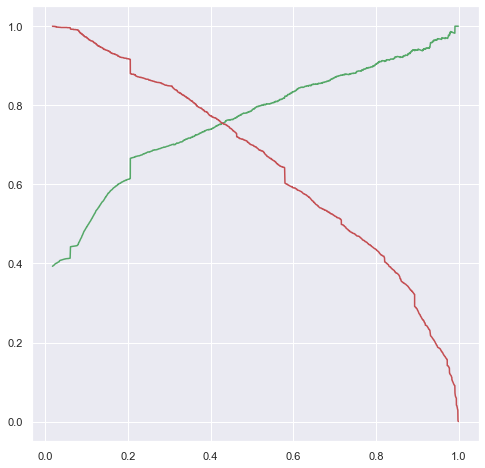

In [161]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [162]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])



In [163]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Other LastNotableActivity,Last Notable Activity_SMS Sent
3271,0,-0.5910,0,0,0,0,0,0,1,0,0,0
1490,0,1.8941,1,0,0,0,0,0,0,1,0,0
7936,0,-0.7431,0,0,0,0,0,0,1,0,0,0
4216,0,-0.8787,0,0,1,0,0,0,0,0,0,0
3830,0,-0.5782,1,0,0,0,0,0,0,0,0,0


In [164]:
X_test_sm = sm.add_constant(X_test)

- Making predictions on the test set

In [165]:
y_test_pred = res.predict(X_test_sm)

In [166]:
y_test_pred[:10]

3271   0.1037
1490   0.9597
7936   0.0892
4216   0.8948
3830   0.1073
1800   0.5713
6507   0.3732
4821   0.2535
4223   0.9314
4714   0.2074
dtype: float64

In [167]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [168]:
# Let's see the head
y_pred_1.head()

,0
3271,0.1037
1490,0.9597
7936,0.0892
4216,0.8948
3830,0.1073


In [169]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [170]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [171]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [172]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [173]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.1037
1,1,1490,0.9597
2,0,7936,0.0892
3,1,4216,0.8948
4,0,3830,0.1073


In [174]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [175]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [176]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.1037
1,1490,1,0.9597
2,7936,0,0.0892
3,4216,1,0.8948
4,3830,0,0.1073


##### From Precision and recall tradeoff threshold, we can see the cutoff is 0.45

In [177]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [178]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.1037,0
1,1490,1,0.9597,1
2,7936,0,0.0892,0
3,4216,1,0.8948,1
4,3830,0,0.1073,0


####  Let's check the overall accuracy.

In [179]:

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8075651854572163

In [180]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1476,  258],
       [ 266,  723]], dtype=int64)

In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.731041456016178

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.8512110726643599

- Creating new feild "Lead Score" for test data, which is between 0 to 100. 

In [184]:
X_test['Lead Score']=y_pred_final.Converted_Prob.values

In [185]:
X_test['Lead Score']=round((X_test['Lead Score']*100),2)

In [186]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Other LastNotableActivity,Last Notable Activity_SMS Sent,Lead Score
3271,0,-0.5910,0,0,0,0,0,0,1,0,0,0,10.3700
1490,0,1.8941,1,0,0,0,0,0,0,1,0,0,95.9700
7936,0,-0.7431,0,0,0,0,0,0,1,0,0,0,8.9200
4216,0,-0.8787,0,0,1,0,0,0,0,0,0,0,89.4800
3830,0,-0.5782,1,0,0,0,0,0,0,0,0,0,10.7300


#### We can see that the ovarall accuracy score is 81%, which is very good score for the model. So, we will go ahaed and again see the important features, on which, the organisation can focus more.

In [187]:
for i in range(0,(len(Lead_Data_Final2.columns)-1)):
    print(Lead_Data_Final2.columns[i])

Prospect ID
Lead Origin
Lead Source
Do Not Email
Do Not Call
Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
Last Activity
Specialization
What is your current occupation
City


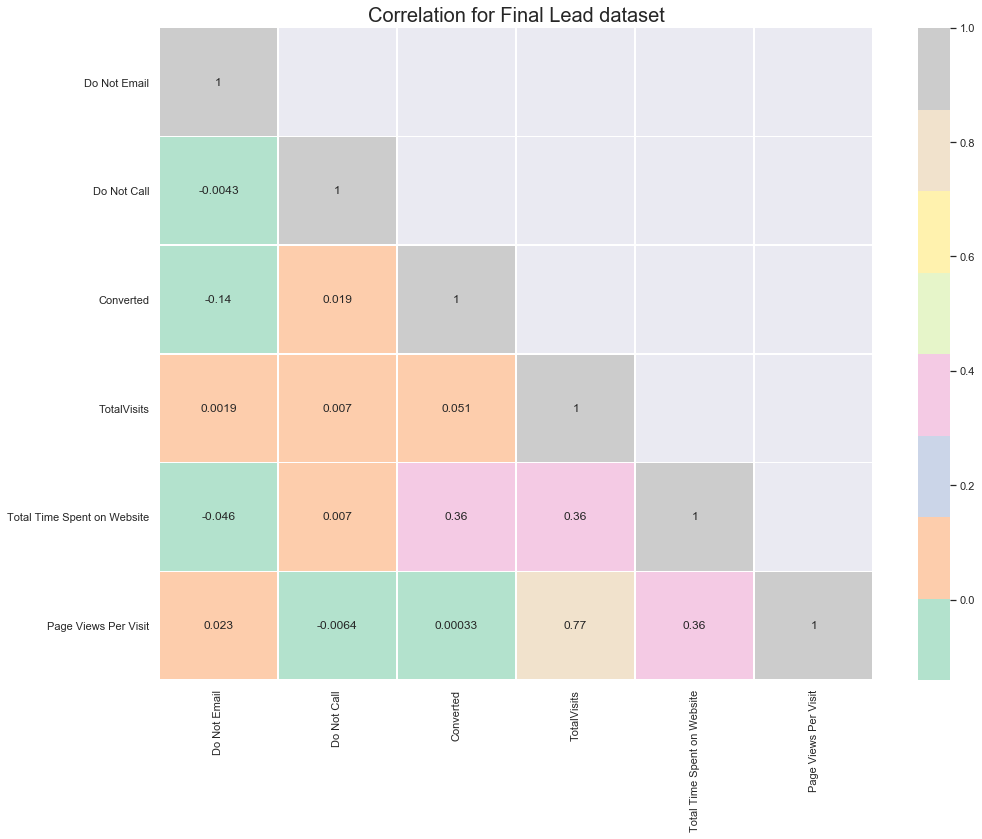

In [188]:


sns.set(font_scale=1)
plt.figure(figsize=(16,12))

mask = np.array(Lead_Data_Final2[:].corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(Lead_Data_Final2.corr(), annot = True, cmap ='Pastel2',linewidths=.5,mask=mask)

ax = plt.axes()


ax.set_title('Correlation for Final Lead dataset', fontsize = 20)
plt.show()

- From above correlation matrix, we can see Total time spent on website and Converted are highly co-related. 

##### Splitting the filtered data into train and test to assign the lead score (considering logistic probability value) to each leads.

In [189]:
lead_Data_Train, lead_Data_Test = train_test_split(Lead_Data_Final2, train_size=0.7, test_size=0.3, random_state=100)

- Creating a new variable "Converted_Score" to store lead scores for test data set with original required variables.


In [190]:
lead_Data_Test['Lead score']=y_pred_final.Converted_Prob.values

In [191]:

lead_Data_Test['Lead score']=round((lead_Data_Test['Lead score']*100),2)

- Let's see th ehead of the test dataset with lead scores.

In [192]:
lead_Data_Test.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead score
3271,afc71cc4-67a4-42ae-89f7-779d20c5810d,API,Google,0,0,0,4.0000,157,4.0000,Email Opened,Others,Unemployed,Mumbai,Email Opened,10.3700
1490,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,Landing Page Submission,Direct Traffic,0,0,1,5.0000,1513,5.0000,Email Opened,Media and Advertising,Working Professional,Mumbai,Email Opened,95.9700
7936,774a3b07-491d-4311-ad51-b25cc8cc59ec,API,Google,0,0,0,2.0000,74,2.0000,Email Opened,Others,Unemployed,Mumbai,Email Opened,8.9200
4216,16b63196-0da9-4b2d-974d-21d8f625f5ef,Lead Add Form,Reference,0,0,1,0.0000,0,0.0000,Email Opened,E-COMMERCE,Student,Mumbai,Modified,89.4800
3830,cbd89429-18cd-47b1-9699-21987bd70a8e,Landing Page Submission,Organic Search,0,0,0,8.0000,164,6.0000,Email Opened,Retail Management,Unemployed,Other Cities,Email Opened,10.7300


#### Plotting graphs between all the variables and Lead Scores

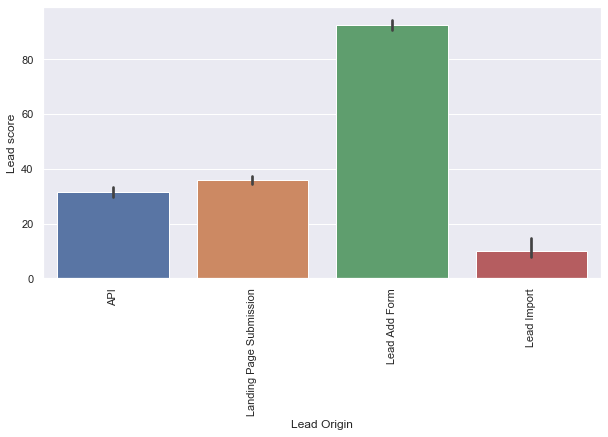

In [193]:
plt.figure(figsize = (10,5))
s=sns.barplot(x="Lead Origin", y="Lead score", data=lead_Data_Test)

s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- After calculating Lead score, we can see leads, who are added by lead add form. 


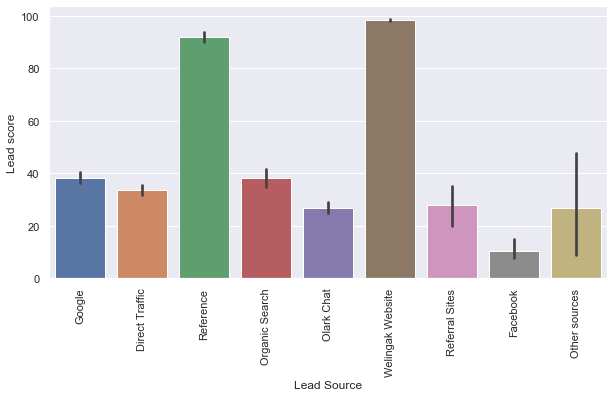

In [194]:
plt.figure(figsize = (10,5))
s=sns.barplot(x="Lead Source", y="Lead score", data=lead_Data_Test)

s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Welingak and reference are the main source for leads.


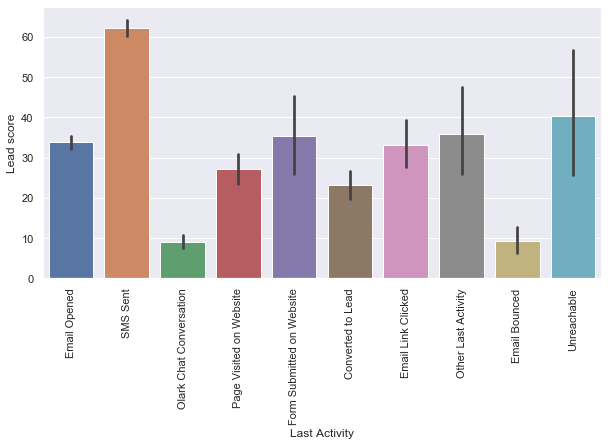

In [195]:
plt.figure(figsize = (10,5))
s=sns.barplot(x="Last Activity", y="Lead score", data=lead_Data_Test)

s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- As per lead score, the last activity is done by leads are sending SMS, Email. So, These would be the notable way to communicate the leads.


## Conclusion and Recomendation

- The lead scores are assigned to each lead and it will help X Education to identify the potential leads, called as 'Hot    leads'. So that, the company can successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
- The potential leads can be decided on the basis of lead scores now. 
- If the lead score is higher i.e. greater than 80, then the lead is hot and is most likely to convert. 
- If the lead score is low i.e. let's say less than 50, then lead is low and will mostly not get converted.

##### X Education can focus on below criterias of the leads to identify the more potential leads.

- Lead Origin : API, Landing Page Submission and Lead Add 
- Lead Source : Direct Traffic, Google, reference and welingak website
- Do Not Email
- Do Not Call
- TotalVisits  
- Total Time Spent on Website 
- Page Views Per Visit
- Last Activity : Email and SMS
- Specialization 
- What is your current occupation : Unemployed & Working Professional
- City : Mumbai
